# Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from glob import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#extracting path of cropped images

fpath = glob('./pri_cropped_images_female/female*.jpg')
mpath = glob('./pri_cropped_images_male/male*.jpg')

In [4]:
print('female', len(fpath))
print('male', len(mpath))

female 4644
male 5269


In [5]:
df_female = pd.DataFrame (fpath, columns = ['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame (mpath, columns = ['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis = 0)
df.head()

,filepath,gender
0,./pri_cropped_images_female\female_0.jpg,female
1,./pri_cropped_images_female\female_1.jpg,female
2,./pri_cropped_images_female\female_10.jpg,female
3,./pri_cropped_images_female\female_100.jpg,female
4,./pri_cropped_images_female\female_1000.jpg,female


In [6]:
df.tail()

,filepath,gender
5264,./pri_cropped_images_male\male_995.jpg,male
5265,./pri_cropped_images_male\male_996.jpg,male
5266,./pri_cropped_images_male\male_997.jpg,male
5267,./pri_cropped_images_male\male_998.jpg,male
5268,./pri_cropped_images_male\male_999.jpg,male


In [7]:
df.shape

(9913, 2)

In [8]:
#extracting size of images

def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]
    

In [9]:
df['Dimensions'] = df['filepath'].apply(get_size)

In [10]:
df.tail()

,filepath,gender,Dimensions
5264,./pri_cropped_images_male\male_995.jpg,male,122
5265,./pri_cropped_images_male\male_996.jpg,male,66
5266,./pri_cropped_images_male\male_997.jpg,male,122
5267,./pri_cropped_images_male\male_998.jpg,male,100
5268,./pri_cropped_images_male\male_999.jpg,male,122


In [11]:

gender_dist = df['gender'].value_counts()
gender_dist


male      5269
female    4644
Name: gender, dtype: int64

# Visualization


1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart

<AxesSubplot:ylabel='gender'>

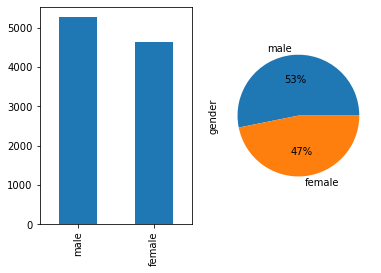

In [12]:
#visualize distribution of female and male images 

fig, ax = plt.subplots(nrows = 1, ncols = 2)
gender_dist.plot(kind = 'bar', ax=ax[0])
gender_dist.plot(kind = 'pie', ax = ax[1], autopct = '%0.0f%%')

2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”

# Histogram

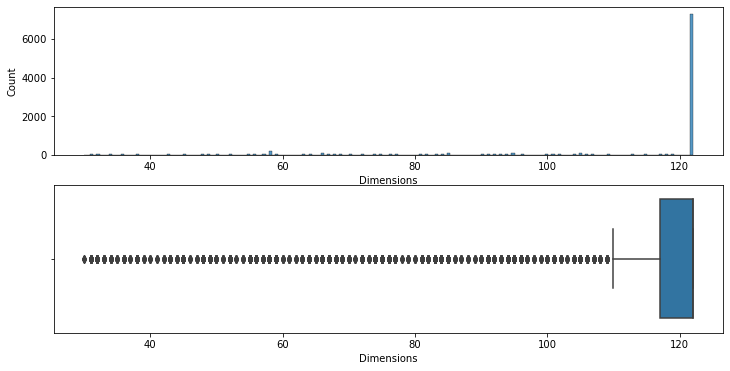

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['Dimensions'])
plt.subplot(2,1,2)
sns.boxplot(df['Dimensions'])
plt.show()

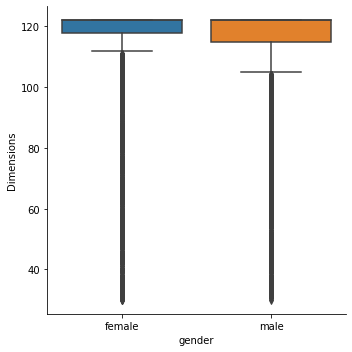

In [14]:
sns.catplot(data=df, x = 'gender' , y = 'Dimensions', kind = 'box')

# Conclusion from boxplot:

### 1. Almost equal distribution of female and male
### 2. Images have dimensions more than 60
### 3. Female images are of HD quality in comparison with male images

**------------------------------------------------------------------------------------------------------------------------**

- **Consider images with dimension more than 60**
- **Resize all the images to 100 x 100**

In [15]:
df_filter = df.query('Dimensions > 60')

In [16]:
df_filter.shape

(9051, 3)

In [17]:
df_filter['gender'].value_counts(normalize = True)

male      0.531102
female    0.468898
Name: gender, dtype: float64

### Structure the images to 100 x 100 size

In [18]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array   

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # step -4: Flatten Image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [19]:
df_filter['data'] = df_filter['filepath'].apply(structuring)

In [20]:
df_filter.tail()

,filepath,gender,Dimensions,data
5264,./pri_cropped_images_male\male_995.jpg,male,122,"[104, 71, 57, 48, 70, 104, 102, 63, 71, 74, 88..."
5265,./pri_cropped_images_male\male_996.jpg,male,66,"[95, 95, 98, 100, 95, 79, 63, 49, 35, 22, 28, ..."
5266,./pri_cropped_images_male\male_997.jpg,male,122,"[63, 62, 59, 55, 56, 63, 68, 69, 72, 76, 76, 7..."
5267,./pri_cropped_images_male\male_998.jpg,male,100,"[107, 107, 107, 106, 129, 145, 152, 138, 128, ..."
5268,./pri_cropped_images_male\male_999.jpg,male,122,"[178, 178, 178, 180, 181, 181, 181, 181, 179, ..."


In [21]:
data = df_filter['data'].apply(pd.Series)

In [22]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,196,195,194,196,198,195,192,188,180,146,...,156,160,164,166,170,180,185,186,190,194
1,237,234,229,238,237,230,238,241,220,219,...,185,193,193,191,195,200,191,180,172,171
2,170,164,161,162,166,170,173,173,168,162,...,103,108,102,92,86,94,97,88,65,51
3,55,46,53,65,37,51,45,40,53,47,...,87,84,85,81,80,82,87,88,84,80
4,24,17,13,13,15,14,13,9,10,9,...,169,168,167,167,167,163,159,155,149,143


In [23]:
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,196,195,194,196,198,195,192,188,180,146,...,156,160,164,166,170,180,185,186,190,194
1,237,234,229,238,237,230,238,241,220,219,...,185,193,193,191,195,200,191,180,172,171
2,170,164,161,162,166,170,173,173,168,162,...,103,108,102,92,86,94,97,88,65,51
3,55,46,53,65,37,51,45,40,53,47,...,87,84,85,81,80,82,87,88,84,80
4,24,17,13,13,15,14,13,9,10,9,...,169,168,167,167,167,163,159,155,149,143


## Data normalization

In [24]:
data = data/255.0
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.768627,0.764706,0.760784,0.768627,0.776471,0.764706,0.752941,0.737255,0.705882,0.572549,...,0.611765,0.627451,0.643137,0.650980,0.666667,0.705882,0.725490,0.729412,0.745098,0.760784
1,0.929412,0.917647,0.898039,0.933333,0.929412,0.901961,0.933333,0.945098,0.862745,0.858824,...,0.725490,0.756863,0.756863,0.749020,0.764706,0.784314,0.749020,0.705882,0.674510,0.670588
2,0.666667,0.643137,0.631373,0.635294,0.650980,0.666667,0.678431,0.678431,0.658824,0.635294,...,0.403922,0.423529,0.400000,0.360784,0.337255,0.368627,0.380392,0.345098,0.254902,0.200000
3,0.215686,0.180392,0.207843,0.254902,0.145098,0.200000,0.176471,0.156863,0.207843,0.184314,...,0.341176,0.329412,0.333333,0.317647,0.313725,0.321569,0.341176,0.345098,0.329412,0.313725
4,0.094118,0.066667,0.050980,0.050980,0.058824,0.054902,0.050980,0.035294,0.039216,0.035294,...,0.662745,0.658824,0.654902,0.654902,0.654902,0.639216,0.623529,0.607843,0.584314,0.560784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,0.407843,0.278431,0.223529,0.188235,0.274510,0.407843,0.400000,0.247059,0.278431,0.290196,...,0.764706,0.721569,0.658824,0.635294,0.631373,0.639216,0.654902,0.643137,0.600000,0.588235
5265,0.372549,0.372549,0.384314,0.392157,0.372549,0.309804,0.247059,0.192157,0.137255,0.086275,...,0.360784,0.349020,0.333333,0.329412,0.349020,0.372549,0.380392,0.380392,0.384314,0.384314
5266,0.247059,0.243137,0.231373,0.215686,0.219608,0.247059,0.266667,0.270588,0.282353,0.298039,...,0.368627,0.372549,0.376471,0.376471,0.380392,0.388235,0.384314,0.376471,0.368627,0.364706
5267,0.419608,0.419608,0.419608,0.415686,0.505882,0.568627,0.596078,0.541176,0.501961,0.494118,...,0.580392,0.592157,0.619608,0.643137,0.639216,0.623529,0.600000,0.572549,0.545098,0.529412


In [25]:
data['gender'] = df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.768627,0.764706,0.760784,0.768627,0.776471,0.764706,0.752941,0.737255,0.705882,0.572549,...,0.627451,0.643137,0.650980,0.666667,0.705882,0.725490,0.729412,0.745098,0.760784,female
1,0.929412,0.917647,0.898039,0.933333,0.929412,0.901961,0.933333,0.945098,0.862745,0.858824,...,0.756863,0.756863,0.749020,0.764706,0.784314,0.749020,0.705882,0.674510,0.670588,female
2,0.666667,0.643137,0.631373,0.635294,0.650980,0.666667,0.678431,0.678431,0.658824,0.635294,...,0.423529,0.400000,0.360784,0.337255,0.368627,0.380392,0.345098,0.254902,0.200000,female
3,0.215686,0.180392,0.207843,0.254902,0.145098,0.200000,0.176471,0.156863,0.207843,0.184314,...,0.329412,0.333333,0.317647,0.313725,0.321569,0.341176,0.345098,0.329412,0.313725,female
4,0.094118,0.066667,0.050980,0.050980,0.058824,0.054902,0.050980,0.035294,0.039216,0.035294,...,0.658824,0.654902,0.654902,0.654902,0.639216,0.623529,0.607843,0.584314,0.560784,female


In [26]:
data.isnull().sum().sum()    #checking missing values

0

In [28]:
#method to remove missing values for reference 

data.dropna(inplace = True)
data.shape

(9051, 10001)

In [32]:
import pickle

In [34]:
pickle.dump(data, open('./Pri_Data/data_pri_images_100_100.pickle', mode = 'wb'))

# End